Importing important libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

Reading the data

In [126]:
df= pd.read_csv('titanic.csv')

Understanding the data:
#Shape
#Five rows
#Tail
#Describe
#Missing Data

In [127]:
df.shape

(891, 12)

There are 891 rows and 12 columns in the titanic dataset.

In [128]:
#Five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Those passengers with a 1 survived and those with a 0 under the 'Survived' column died.
The Pclass or passenger class is important because it may indicate survival rate based on class privilleges.
The name of the person  (under Name column) may not provide much information about survival chances but if the name is English, they may have had privilleges during the titanic ages.
The column on sex is categorica data and a string and I may need to convert male and female labels to numeric values. 
The Age column is important as the data is numeric and may be linked to survival chances. 
The SibSp column shows passengers who travelled with their siblings or with their spouses.
The Ticket column does not seem important however, the fare they paid is important because it may indicate their class and therefore linked to their survival.
The Cabin column has null or NAN values and these need to be dealt with in the analysis. 
The Embarked column shiws the city the passengers embarked from.


In [129]:
#Tail
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


The tail end of the data reveals the same information as in the first 5 rows. There are missing data too.

In [130]:
#Describe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The mean age of the passengers was 29.699118 (~30 years) and this could be used to fill the missing data in the Ages column. 
The Parch column shows that the number of passengers who were parents and children ranged from 0 to 6 and most people seem to have travleed alone.

In [131]:
#Null or missing Values
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


The code below generates a heatmap showing missing values in the DataFrame df, with no y-axis tick labels, no color bar, and using the 'virdis' colormap for coloring.

<Axes: >

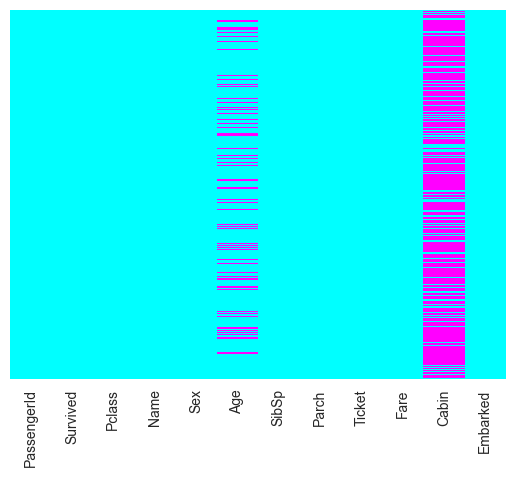

In [132]:
#Visualise null vlaues
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap='cool')

The heatmap above shows there are missing values in the Age and Cabin columns. The Cabin column has far more missing data and it may be worth deleting that column. The statistics below confirm that there are missing values in the Age and Cabin data and with the Cabin missing data of 687 being a lot higher than 177 in the Age column. The proportion of missing data in the Age column is small enough to be replaced by imputation. As mentioned earlier, it may be worth deleting or dropping the Cabin column as it has far too many missing values. 

In [133]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

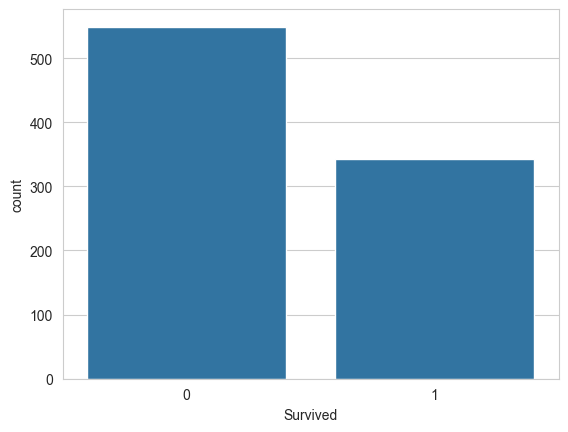

In [134]:
#Visual checks
sns.set_style('whitegrid')
sns.countplot(x='Survived', data =df)

The bar chart above shows that there were more deaths (0) of over 500 than survivors (just above 300).

Inspecting the data further based on how many survived based on their sex.

<Axes: xlabel='Survived', ylabel='count'>

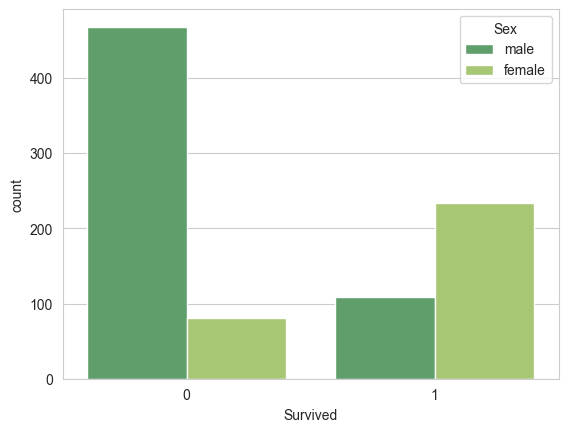

In [135]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue= 'Sex', data =df, palette='summer')

The bar chart above shows that there were more male deaths than females. Conversely, there were more female survivors (1) than male survivors (1). It is possible that the male may have attempted to save their women and children from the the sinking titanic but the men became trapped and were killed in the disaster.

#Checking the survived column and see if there was some conection between survival and their Pclass.
The chart shows that the highest number of deaths were in the 3rd pasenger class. More 1st class passengers survived the disaster. 

<Axes: xlabel='Survived', ylabel='count'>

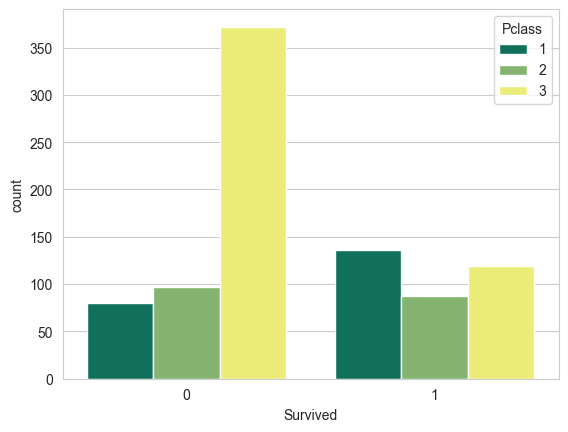

In [136]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue= 'Pclass', data =df, palette='summer')

#Distribution of passengers by age
The highest number of passengers were in the 20-30 age group as shown below.

<Axes: xlabel='Age', ylabel='Count'>

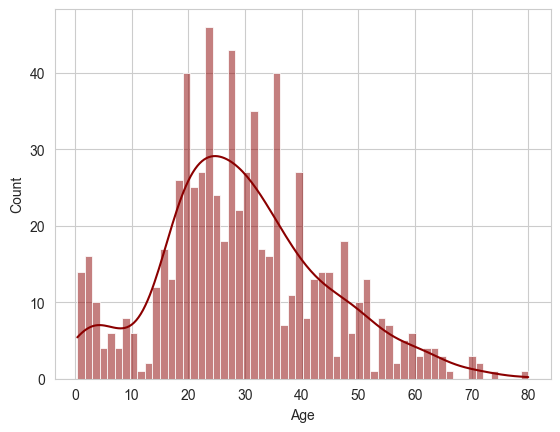

In [137]:
#sns.distplot(df['Age'].dropna(), kde=False, color= 'darkred', bins=60)
sns.histplot(df['Age'].dropna(), kde=True, color='darkred', bins=60)

Count plot of siblings and spouse:
The majority of the dead ones (0), had no siblings and were male.Less than 200 who died were females and had no siblings or spouse. An equal number of male and female (100) who had siblings or spouses survived the titanic disaster.

<Axes: xlabel='SibSp', ylabel='count'>

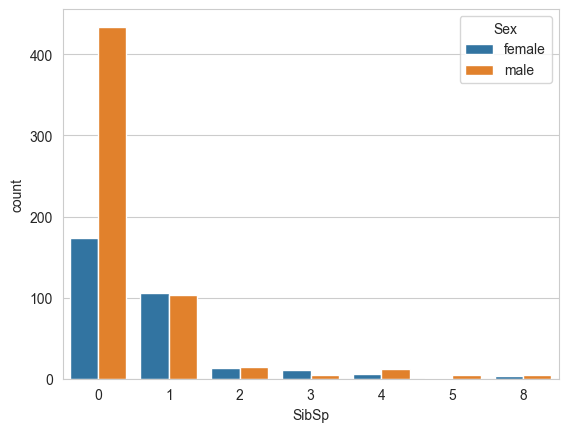

In [138]:
sns.countplot(x='SibSp', hue='Sex', data=df)

#Fare Analysis
The majority of the people had chepaer tickets and therefore may have been from the 3rd class as they could not afford the tickets. Safety provisions may not have been available on the cheaper fare and hence the reason why so many 3rd class passengers died.

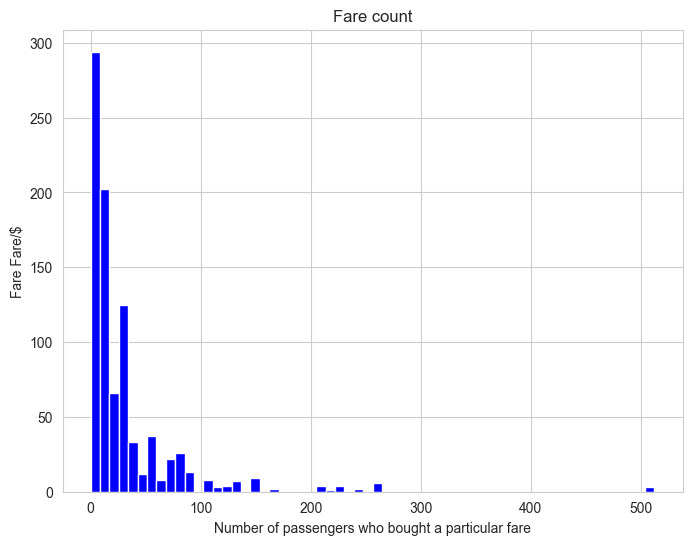

In [139]:
df['Fare'].hist(color='blue', bins= 60, figsize= (8,6))
plt.title("Fare count")
plt.ylabel("Fare Fare/$")
plt.xlabel("Number of passengers who bought a particular fare")
plt.show()

Data Cleaning
The boxplots gives me some important information that I can use to replace the missing values. For example, if a passenger was in the 1st class and their age was missing, I can replace it with 37 (mena age of 1st class). The mean age for the 2nd class was 29.8 (~30 years) years and the mean age for the 3rd class was 24.8 (~25) years. Poorer passengers in the 3rd class tended to be younger while wealthier passengers in the 1st class were older.

In [140]:
#Calculating mean age in each passenger class:
#Paseenger Class 1:
df[df['Pclass']==1]['Age'].mean()



38.233440860215055

In [141]:
#Mean age for pasenger class 2:
df[df['Pclass']==2]['Age'].mean()


29.87763005780347

In [142]:
#Mean age for passenger class 3:
df[df['Pclass']==3]['Age'].mean()

25.14061971830986

<Axes: xlabel='Pclass', ylabel='Age'>

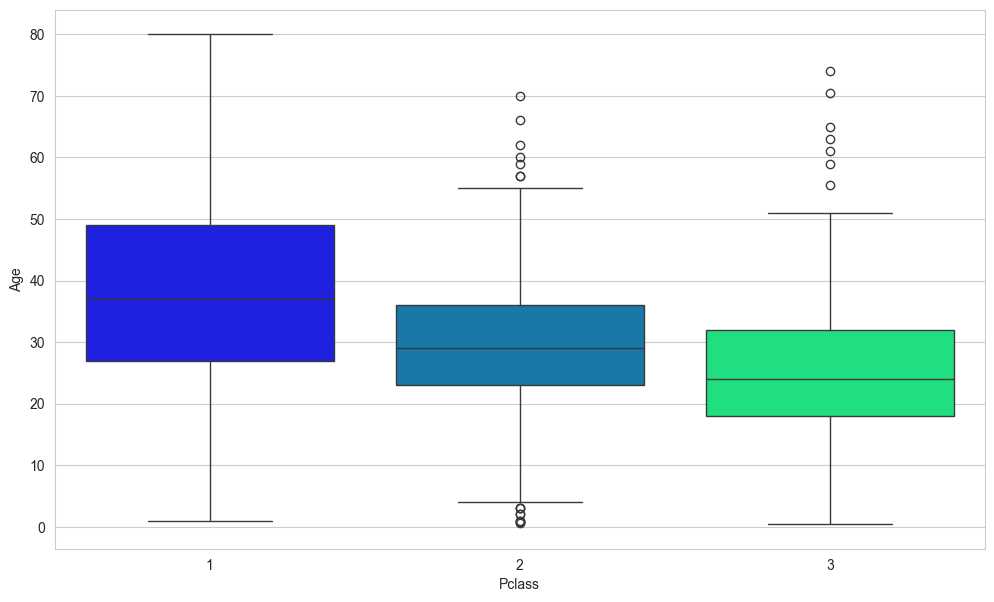

In [143]:
plt.figure(figsize=(12,7))
#sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')
sns.boxplot(x='Pclass', y='Age', hue='Pclass', data=df, palette='winter', legend=False)

In [144]:
#Replacing null values in Age column:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return round(df[df['Pclass']==1]['Age'].mean()) # Mean age of passengers in class 1
        elif Pclass == 2:
            return round(df[df['Pclass']==2]['Age'].mean())  # Mean age of passengers in class 2
        else:
            return round(df[df['Pclass']==3]['Age'].mean())  # Mean age of passengers in class 3
    else:
        return Age

# Apply the function to impute missing values in the 'Age' column
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

# def impute_age(cols):
#     Age = cols[0]
#     Pclass = cols[1]
    
#     if pd.isnull(Age):
#         if Pclass == 1:
#             return 37  # Mean age of passengers in class 1
#         elif Pclass == 2:
#             return 29  # Mean age of passengers in class 2
#         else:
#             return 24  # Mean age of passengers in class 3
#     else:
#         return Age

# Apply the function to impute missing values in the 'Age' column
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

# def impue_age(cols):
#     Age=cols[0]
#     # Pclass=cols[1]
#     if pd.isnull(Age):
#         if Pclass ==1:
#             return 37
#         elif Pclass ==2:
#             return 29
#         else:
#             return 24
#     else:
#         return Age


I have rreplaced all the missing values in the age column using the mean values of the ages in each passenger class. There are far too many null values in the Cabin column and it seems to make sense to drop it. In future I would devote more time to explore some alternative methods than having to drop a column of data.

<Axes: >

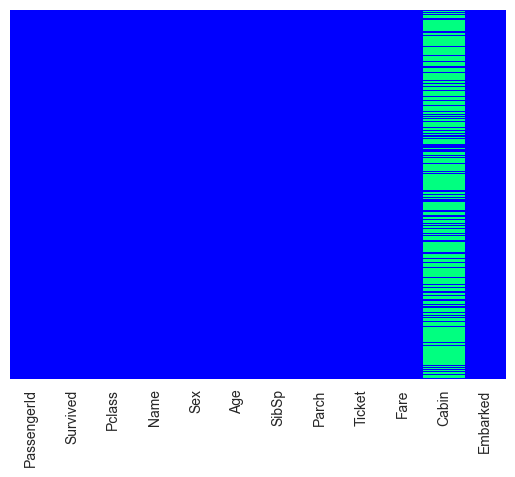

In [145]:
# Create a heatmap to visualize missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='winter')

In [146]:
#Drop Cabin column
df.drop('Cabin', axis=1, inplace=True)

In [147]:
#Check if Cabin column has been dropped. Indeed, the table below confirms the Cabin column has been dropped.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

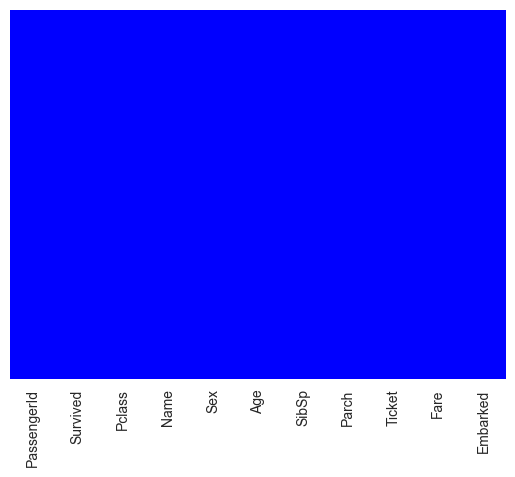

In [148]:
#Plotheatmap of null values to check if all have been dropped:
# Create a heatmap to visualize missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='winter')

All the null values have been either replaced or dropped. The following columns do not seem to add any further insight into the data analysis or to answer a question on who why some people survived or not: PassengerId, Name, and Ticket. I will be dropping these.The Sex column has two categories of male and female. These I will convert to numerical and see if further insights can be derived from the data.

In [149]:
#Converting catgorical features to numerical values:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [150]:
#Coumns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [151]:
# Create dummy variables for the 'Sex' column
# Create dummy variables for the 'Sex' column
sex = pd.get_dummies(df['Sex'], drop_first=True)

# Create dummy variables for the 'Embarked' column
embark = pd.get_dummies(df['Embarked'], drop_first=True)

#sex = pd.get_dummies(df['Sex'], drop_first=True)

# Create dummy variables for the 'Embarked' column
#embark = pd.get_dummies(df['Embarked'], drop_first=True)

# sex=pd.get_dummies(df['Sex'], drop_first=True)
# embark=pd.get_dummies(df['Embarked'],axis=1, inplace=True)

In [152]:
# Drop columns 'Sex', 'Embarked', 'Name', and 'Ticket'
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)


In [153]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [154]:
df=pd.concat([df, sex,embark], axis=1)

In [155]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [156]:
#Converting True and False to 1 and 0:
df['male'] = df['male'].astype(int)
#df['Q'] = df['Q'].astype(int)
#df['S'] = df['S'].astype(int)


In [157]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,False,True
1,2,1,1,38.0,1,0,71.2833,0,False,False
2,3,1,3,26.0,0,0,7.9250,0,False,True
3,4,1,1,35.0,1,0,53.1000,0,False,True
4,5,0,3,35.0,0,0,8.0500,1,False,True


In [158]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
male             int32
Q                 bool
S                 bool
dtype: object

In [159]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,False,True
1,2,1,1,38.0,1,0,71.2833,0,False,False
2,3,1,3,26.0,0,0,7.9250,0,False,True
3,4,1,1,35.0,1,0,53.1000,0,False,True
4,5,0,3,35.0,0,0,8.0500,1,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,False,True
887,888,1,1,19.0,0,0,30.0000,0,False,True
888,889,0,3,25.0,1,2,23.4500,0,False,True
889,890,1,1,26.0,0,0,30.0000,1,False,False


In [160]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

Building a Logistic Regression Model
#Train/Test Split
#Drop Survived column because it is going to be the dependent variable.


In [161]:
#Output data set
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [162]:
#Split data into Training and Test Models
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.20, random_state=42)

# Instantiate scaler
scaler = MinMaxScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data (using the parameters learned from the training data)
X_test_scaled = scaler.transform(X_test)

# Check the scaled training data
X_train_scaled


array([[0.37191011, 0.        , 0.56647399, ..., 1.        , 0.        ,
        1.        ],
       [0.82359551, 0.5       , 0.28373963, ..., 1.        , 0.        ,
        1.        ],
       [0.42921348, 1.        , 0.39683338, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.96629213, 1.        , 0.50992712, ..., 1.        , 0.        ,
        1.        ],
       [0.48876404, 0.        , 0.17064589, ..., 0.        , 0.        ,
        1.        ],
       [0.11460674, 0.        , 0.25860769, ..., 1.        , 0.        ,
        1.        ]])

In [174]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions=knn.predict(X_test)


In [175]:
print(classification_report(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       105
           1       0.65      0.43      0.52        74

    accuracy                           0.67       179
   macro avg       0.66      0.64      0.63       179
weighted avg       0.67      0.67      0.65       179

[[88 17]
 [42 32]]


In [ ]:
From the accuracy measurement below, the the k-nearest neighbors classification has returned an accuracy of 80%, which is pretty good!

In [177]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
knn_predictions = knn_model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, knn_predictions))

# Print confusion matrix
print(confusion_matrix(y_test, knn_predictions))


              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

[[91 14]
 [22 52]]


Training and Predicting

In [166]:
#model=LogisticRegression()
# Increase the maximum number of iterations
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [167]:
predictions =model.predict(X_test)

In [168]:
accuracy =confusion_matrix(y_test, predictions)
accuracy

array([[90, 15],
       [19, 55]], dtype=int64)

In [169]:
predictions


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

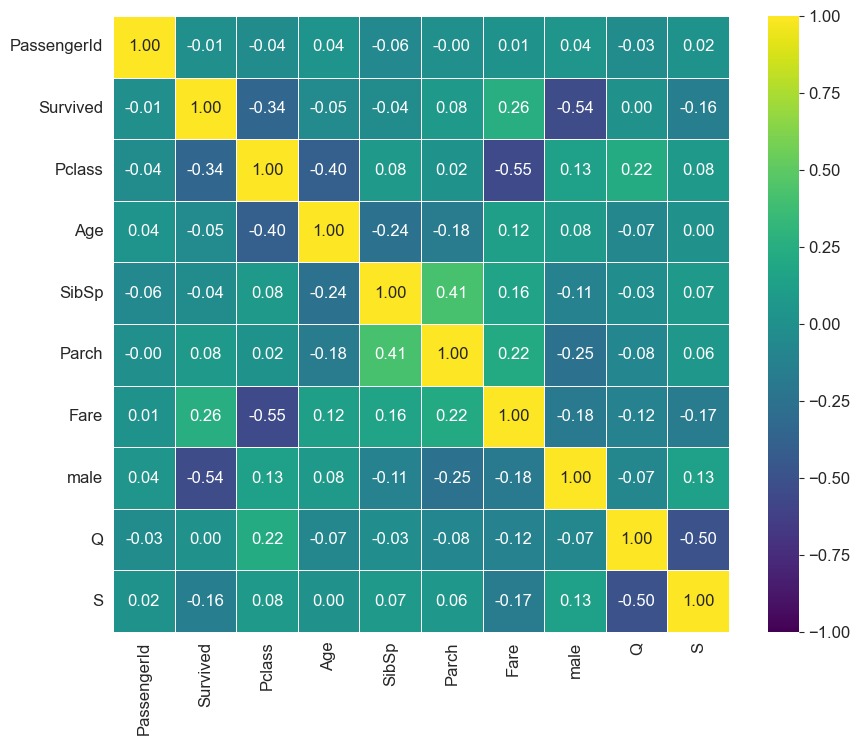

In [172]:
# Calculate the correlation matrix for your DataFrame
correlation_matrix = df.corr()

# Set the figure size and font size
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 12})

# Create the annotated heatmap
sns.heatmap(correlation_matrix, cmap='viridis', vmin=-1, vmax=1, center=0, annot=True, fmt=".2f", square=True, linewidths=.5)

# Show the plot
plt.show()


This heatmap indicates that there was very low or no correaltion between passenger survival and the following factors: pasenger ID, name, and their cabin. There was average correlation between survival and the sex, fare, and passenger class. It would seem to appear that the wealthier passengers purchased tickets in the first class. The first class passengers would have had more equipment and were probably given privilege to escape in smaller boats. Far too many deaths occured in the 3rd class, suggesting these may have been left to fend for themselves. 
The negative correlation of -0.54 between those that survived and the their sex shows has been revealed to indicate more deaths occurred within the males than females. The males would have given opportunities to their spouses and children to survive. 
In conlcusion:
What is the most important factor in determining survival of the Titanic incident?- it had to be the class of the passengers because it is backed by the fare on the heatmap.

● In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data? This is strongly backed by the analysed data.
● “Women and children first”. Was this the case? This again is also backed by the analysis that I have carried throughout this file.

In [171]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64